## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
number_rows = df.shape[0]
number_rows

294478

c. The number of unique users in the dataset.

In [5]:
unique_users = df.user_id.nunique()
unique_users

290584

d. The proportion of users converted.

In [6]:
total_conversion = df[df['converted'] == 1]['user_id'].nunique() / df['user_id'].nunique()
total_conversion

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
df[((df['group'] == 'treatment') == True) != ((df['landing_page'] == 'new_page') == True)].count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df[((df['group'] == 'treatment') == True) == ((df['landing_page'] == 'new_page') == True)]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
unique_users2 = df2.user_id.nunique()
unique_users2

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2 = df2.reset_index()

In [13]:
df2[df2['user_id'].duplicated() == True]

,index,user_id,timestamp,group,landing_page,converted
2862,2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [14]:
#2983

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.shape

(290585, 6)

In [16]:
df2 = df2.drop(df2.index[2862])

In [17]:
df2.iloc[[2862]]

,index,user_id,timestamp,group,landing_page,converted
2863,2894,884145,2017-01-09 15:45:38.457508,treatment,new_page,0


In [18]:
df2[df2['user_id'].duplicated() == True]

,index,user_id,timestamp,group,landing_page,converted


In [19]:
df2.shape

(290584, 6)

In [20]:
df2 = df2.reset_index()

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
converted_df2 = df2.query('converted == "1"').count()
df2_rows = df2.count()
all_conversion_rate = converted_df2/df2_rows
all_conversion_rate

level_0         0.119597
index           0.119597
user_id         0.119597
timestamp       0.119597
group           0.119597
landing_page    0.119597
converted       0.119597
dtype: float64

b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
control_converted = df2.query('group =="control" and converted == "1"').count()
group_control = df2.query('group =="control"').count()
control_conversion_rate = control_converted/group_control
control_conversion_rate

level_0         0.120386
index           0.120386
user_id         0.120386
timestamp       0.120386
group           0.120386
landing_page    0.120386
converted       0.120386
dtype: float64

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
treatment_converted = df2.query('group =="treatment" and converted == "1"').count()
group_treatment = df2.query('group =="treatment"').count()
treatment_conversion_rate = treatment_converted/group_treatment
treatment_conversion_rate

level_0         0.118808
index           0.118808
user_id         0.118808
timestamp       0.118808
group           0.118808
landing_page    0.118808
converted       0.118808
dtype: float64

d. What is the probability that an individual received the new page?

In [24]:
new_page_total= df2.query('landing_page =="new_page"').count()
new_page_prob = new_page_total/df2_rows
new_page_prob

level_0         0.500062
index           0.500062
user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

The new treatment page appears not to lead to more conversions than the old page. 

The probability of converting for an individual who received the control page is 0.1204. 

The probability of converting an individual who received the treatment page is 0.1188. 

The probability of an individual receiving the control page and the probability of an individual receiving the treatment page seems to be almost equal with the probability of an individual receiving the treatment page at 0.5001. 

There appears to be no evidence that the new page leads to more conversions. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}$** = **$p_{new}$** - **$p_{old}$** ≤ 0

**$H_{1}$** = **$p_{new}$** - **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [25]:
p_new = (df2.converted == 1).mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [26]:
p_old = (df2.converted == 1).mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [27]:
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [28]:
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique() 
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p_new, p_new])
new_page_converted

array([0, 0, 0, ..., 0, 0, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old])
old_page_converted

array([1, 0, 0, ..., 0, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
new_page_converted.mean() - old_page_converted.mean()

-0.0025140479844679847

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [32]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, 1-p_new])
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, 1-p_new])
    p_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   14.,    98.,   545.,  1647.,  3021.,  2685.,  1458.,   451.,
           76.,     5.]),
 array([ -4.63391015e-03,  -3.69513831e-03,  -2.75636648e-03,
         -1.81759464e-03,  -8.78822803e-04,   5.99490332e-05,
          9.98720870e-04,   1.93749271e-03,   2.87626454e-03,
          3.81503638e-03,   4.75380822e-03]),
 <a list of 10 Patch objects>)

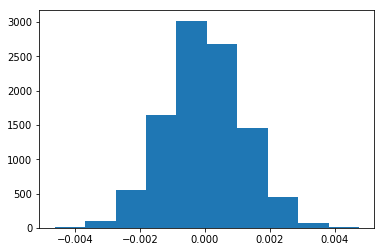

In [33]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
actual_diff = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
actual_diff

-0.0015782389853555567

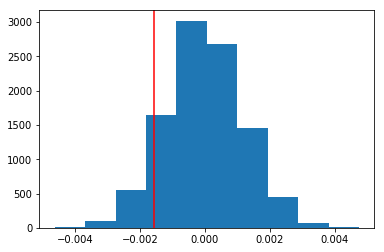

In [35]:
plt.hist(p_diffs)
plt.axvline(actual_diff, color='r')

In [36]:
p_diffs = np.array(p_diffs)
p_val = (p_diffs > actual_diff).mean()
p_val

0.90469999999999995

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The p-value in this study is 0.905. In the majority of analyses, an alpha of 0.05 is used as the cutoff for significance. In this analysis, the p-value is larger than 0.05 and we, therefore, cannot conclude that a significant difference exists. Therefore, we fail to reject the null hypothesis. There is no conclusive difference between the old and new pages. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [39]:
import statsmodels.api as sm

converted_old = len(df2[df2.landing_page == 'old_page'][df2.converted == 1])
converted_new = len(df2[df2.landing_page == 'new_page'][df2.converted == 1])
n_old = len(df2[df2.landing_page == 'old_page'])
n_new = len(df2[df2.landing_page == 'new_page'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [41]:
z_score, p_value = sm.stats.proportions_ztest([converted_new, converted_old], [n_new, n_old], alternative='larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


In [46]:
# Tells us how significant our z-score is
from scipy.stats import norm
norm.cdf(z_score)

0.094941687240975514

In [47]:
# Tells us what our critical value at 95% confidence is
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-value is obtained from a one-tail test as we are checking if two proportions are statistically worse-than each other. Since the z-value of -1.31 does not exceed the critical value at 95% confidence - which is 1.96, we fail to reject the null hypothesis. 

The p-value of 0.91 is larger than 0.05 and so we also fail to reject the null hypothesis using the p-value.

In other words, the new page is statistically no different and nor better than the old page. We would expect their long-term performance to be similar to one another. The conclusion is the same as the findings in parts **j.** and **k.** 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression model as logistic regression predicts one of only two outcomes.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [48]:
df2.head()

,level_0,index,user_id,timestamp,group,landing_page,converted
0,0,0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,1,1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,2,2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,3,3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,4,4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [49]:
df2['intercept'] = 1
df2[['drop', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop('drop', axis=1, inplace=True)
df2.head()

,level_0,index,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,0,0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,1,1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,2,2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,3,3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,4,4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [53]:
logit = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 Feb 2019   Pseudo R-squ.:               8.077e-06
Time:                        05:18:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value associated with ab_page is 0.190. The reason it differs from the value I found in Part II is because in Part II, is the fact that they are analyzing seperate things. In part II, the null hypothesis was that the old page was more effective or equally as effective at converting users than the new page. In part III, the null hypothesis is that the old page has the same effectiveness as the new page. The alternate hypothesis is that the new page is not equal in effectiveness as the old page. The p-value from part III shows is more than 0.05, which means we reject the null hypothesis that both pages have equal effectiveness at converting users.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

The advantages of considering other factors to add into my regression model is that we would be able to find out other factors that may influence why a person converts or does not convert. An example is the demography of converts. Perhaps you find out that most of your converts are in a specific age bracket, or are a specific gender, or are from a specific country, you can then begin to use that information when you market or decide on designing a new page. 

Although considering other factors that could help us determine the cause of converts beyond the new page versus the old page could provide further insight as to whether the new page really affects or doesn't affect the conversion rate, there are some disadvantages. For example, We would like x-variables to be related to the response, but not to be related to one another (i.e. multicollinearity). Below are further issues related to adding additional terms to the regression model:
- Non-linearity of the response-predictor relationships
- Correlation of error terms
- Non-constant Variance and Normally Distributed Errors
- Outliers/ High leverage points
- Multicollinearity


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [76]:
countries = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,CA,UK,US,level_0,index,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,,,,,,
822059,UK,0,1,0,253788,257177,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,0,1,0,48089,48778,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,0,1,0,105225,106686,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1
909908,UK,0,1,0,118943,120612,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1
811617,US,0,0,1,128603,130400,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1


In [77]:
countries_dummies = pd.get_dummies(df_new['country'])
df_countries = df.join(countries_dummies)
df_countries.head()

,user_id,timestamp,group,landing_page,converted,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,NaN,NaN,NaN
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,NaN,NaN,NaN
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,NaN,NaN,NaN
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,NaN,NaN,NaN
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,NaN,NaN,NaN


In [87]:
logit = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290582
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            2
Date:                Wed, 27 Feb 2019   Pseudo R-squ.:               1.522e-05
Time:                        06:51:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1981
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.747      0.455      -0.016       0.036
==============================================================================
"""

In [80]:
np.exp(results.params)

intercept    0.136796
CA           0.960057
UK           1.009943
ab_page      0.985168
dtype: float64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

The p-values for all countries are above 0.05 which signifies that they are statistically insignificant in predicting the conversion of users.

## Conclusion

This project aimed to help the company understand if they should implement this new page, keep the old page, or perhaps run the experiment longer to make their decision. 

In Part II, we assumed the old page was more effective or equally as effective at converting users than the new page (null hypothesis). This study concluded that with a p-value of 0.905, we could not reject the null hypothesis. We also calculated the z-value which also failed to reject the null hypothesis.

In Part III, we used the logistic regression model to calculate the p-value. The results also could not reject the null hypothesis.

We also introducted another factor into the regression model, the country in which a user lives. This was to avoid Simpson's Paradox and make sure there was consistency among test subjects in the control and experiment group. There was no indication that the user's country of residence significantly effected their conversion rate.

We can therefore also conclude that there is no practical reason to adopt the new page as there is no evidence that the new page raises the conversion rates for users and therefore, it is not worth the cost nor time of launching the new page.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [88]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0